In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

77


In [3]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=imperial"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        #cities.remove(name)
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")


Beginning Data Retrieval
------------------------------
Processing record 0 | Coihaique
Data visual: 1

Processing record 1 | Ushuaia
Data visual: 2

Processing record 2 | Naron
Data visual: 3

Processing record 3 | Port-cartier
Data visual: 4

Processing record 4 | Bhan
Data visual: 5

Processing record 5 | Paamiut
Data visual: 6

Processing record 6 | Sao filipe
Data visual: 7

Processing record 7 | Mataura
Data visual: 8

Processing record 8 | Bend
Data visual: 9

Processing record 9 | Vermilion
Data visual: 10

Processing record 10 | Chapais
Data visual: 11

Processing record 11 | New norfolk
Data visual: 12

Processing record 12 | Krasnoarmeysk
Data visual: 13

Processing record 13 | Barrow
Data visual: 14

Processing record 14 | Chuy
Data visual: 15

No data found for Burica. Skipping...
Data visual: 16

No data found for Taolanaro. Skipping...
Data visual: 17

Processing record 17 | Trairi
Data visual: 18

Processing record 18 | Victoria
Data visual: 19

Processing record 19 | P

In [4]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.58,-72.07,37.89,84,39,4.81,CL,1602728495
1,ushuaia,-54.8,-68.3,46.4,52,75,8.05,AR,1602728376
2,naron,43.52,-8.15,50,100,40,4.7,ES,1602728496
3,port-cartier,50.03,-66.87,46,100,90,8.05,CA,1602728496
4,bhan,26.56,67.72,74.39,19,0,3.11,PK,1602728496
...,...,...,...,...,...,...,...,...,...
72,kirakira,-10.45,161.92,84.97,68,99,3.91,SB,1602728514
73,upernavik,72.79,-56.15,31.93,92,56,3.62,GL,1602728515
74,tazovskiy,67.47,78.7,31.71,95,95,18.43,RU,1602728515
75,aurangabad,19.88,75.33,75.2,94,75,5.82,IN,1602728515


In [5]:
over_100 = city_data.loc[city_data["Humidity"] < 50]

over_100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,bhan,26.56,67.72,74.39,19,0,3.11,PK,1602728496
7,mataura,-46.19,168.86,55.99,47,0,8.01,NZ,1602728497
9,vermilion,40.17,-87.75,69.8,30,1,10.29,US,1602728497
24,laguna,38.42,-121.42,86,16,1,11.41,US,1602728502
27,seoul,37.57,126.98,53.6,32,75,3.36,KR,1602727678
31,yulara,-25.24,130.99,89.6,10,0,12.75,AU,1602728287
33,busselton,-33.65,115.33,66,47,5,6.89,AU,1602728504
45,san rafael,-34.62,-68.33,67.5,30,12,9.37,AR,1602728507
53,te anau,-45.42,167.72,52.47,46,0,1.45,NZ,1602728509
69,marzuq,14.4,46.47,65.86,25,0,2.75,YE,1602728514


In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] < 50].index
humid_index

Int64Index([4, 7, 9, 24, 27, 31, 33, 45, 53, 69], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.58,-72.07,37.89,84,39,4.81,CL,1602728495
1,ushuaia,-54.8,-68.3,46.4,52,75,8.05,AR,1602728376
2,naron,43.52,-8.15,50,100,40,4.7,ES,1602728496
3,port-cartier,50.03,-66.87,46,100,90,8.05,CA,1602728496
5,paamiut,61.99,-49.67,37.98,79,100,10.29,GL,1602728496
...,...,...,...,...,...,...,...,...,...
72,kirakira,-10.45,161.92,84.97,68,99,3.91,SB,1602728514
73,upernavik,72.79,-56.15,31.93,92,56,3.62,GL,1602728515
74,tazovskiy,67.47,78.7,31.71,95,95,18.43,RU,1602728515
75,aurangabad,19.88,75.33,75.2,94,75,5.82,IN,1602728515


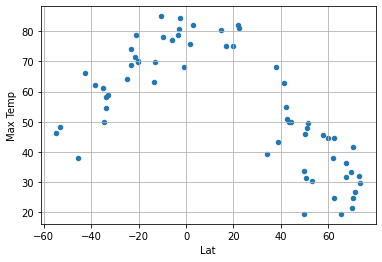

In [8]:
lat_vs_temp = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True)
plt.xlabel = "Latitude"
plt.ylabel = "Max Temperature (F)"
plt.title = "Latitude vs Max Temp (F)"
plt.savefig = "../output_data/Latitude vs Max Temp.png"
plt.show()

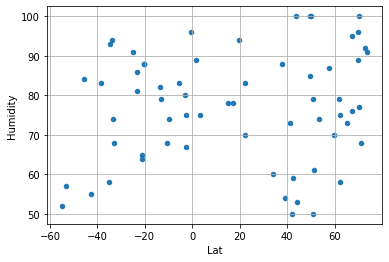

In [17]:
lat_vs_humidity = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Humidity", grid = True)
# plt.ylim(-60, 80)
# plt.ylim(-10, 35)
plt.title = 'Latitude vs Humidity'
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.savefig('Latitude vs Humidity.png')
plt.show()